<h3>Motive:- </h3>Use different feature engineering in a Logistic Regression Model and check which feature engineering performs best

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_selection import RFE
from sklearn.decomposition import TruncatedSVD
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score

In [2]:
german_credit_rating=pd.read_csv("../data/German Credit Data.csv")

In [3]:
german_credit_rating.head(10)

,checkin_acc,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,A11,6,A34,1169,A65,A75,4,A93,4,67,A143,2,A173,0
1,A12,48,A32,5951,A61,A73,2,A92,2,22,A143,1,A173,1
2,A14,12,A34,2096,A61,A74,2,A93,3,49,A143,1,A172,0
3,A11,42,A32,7882,A61,A74,2,A93,4,45,A143,1,A173,0
4,A11,24,A33,4870,A61,A73,3,A93,4,53,A143,2,A173,1
5,A14,36,A32,9055,A65,A73,2,A93,4,35,A143,1,A172,0
6,A14,24,A32,2835,A63,A75,3,A93,4,53,A143,1,A173,0
7,A12,36,A32,6948,A61,A73,2,A93,2,35,A143,1,A174,0
8,A14,12,A32,3059,A64,A74,2,A91,4,61,A143,1,A172,0
9,A12,30,A34,5234,A61,A71,4,A94,2,28,A143,2,A174,1


In [4]:
german_credit_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   checkin_acc        1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   amount             1000 non-null   int64 
 4   savings_acc        1000 non-null   object
 5   present_emp_since  1000 non-null   object
 6   inst_rate          1000 non-null   int64 
 7   personal_status    1000 non-null   object
 8   residing_since     1000 non-null   int64 
 9   age                1000 non-null   int64 
 10  inst_plans         1000 non-null   object
 11  num_credits        1000 non-null   int64 
 12  job                1000 non-null   object
 13  status             1000 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 109.5+ KB


In [5]:
german_credit_rating.shape

(1000, 14)

In [6]:
german_credit_rating.describe(include='all')

,checkin_acc,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate,personal_status,residing_since,age,inst_plans,num_credits,job,status
count,1000,1000.000000,1000,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000.000000,1000,1000.000000,1000,1000.000000
unique,4,NaN,5,NaN,5,5,NaN,4,NaN,NaN,3,NaN,4,NaN
top,A14,NaN,A32,NaN,A61,A73,NaN,A93,NaN,NaN,A143,NaN,A173,NaN
freq,394,NaN,530,NaN,603,339,NaN,548,NaN,NaN,814,NaN,630,NaN
mean,NaN,20.903000,NaN,3271.258000,NaN,NaN,2.973000,NaN,2.845000,35.546000,NaN,1.407000,NaN,0.300000
std,NaN,12.058814,NaN,2822.736876,NaN,NaN,1.118715,NaN,1.103718,11.375469,NaN,0.577654,NaN,0.458487
min,NaN,4.000000,NaN,250.000000,NaN,NaN,1.000000,NaN,1.000000,19.000000,NaN,1.000000,NaN,0.000000
25%,NaN,12.000000,NaN,1365.500000,NaN,NaN,2.000000,NaN,2.000000,27.000000,NaN,1.000000,NaN,0.000000
50%,NaN,18.000000,NaN,2319.500000,NaN,NaN,3.000000,NaN,3.000000,33.000000,NaN,1.000000,NaN,0.000000
75%,NaN,24.000000,NaN,3972.250000,NaN,NaN,4.000000,NaN,4.000000,42.000000,NaN,2.000000,NaN,1.000000


<h2>1st Change:-</h2> Implement Simple One Hot Coding

In [7]:
german_credit_rating=pd.get_dummies(german_credit_rating,drop_first=True)

<Axes: >

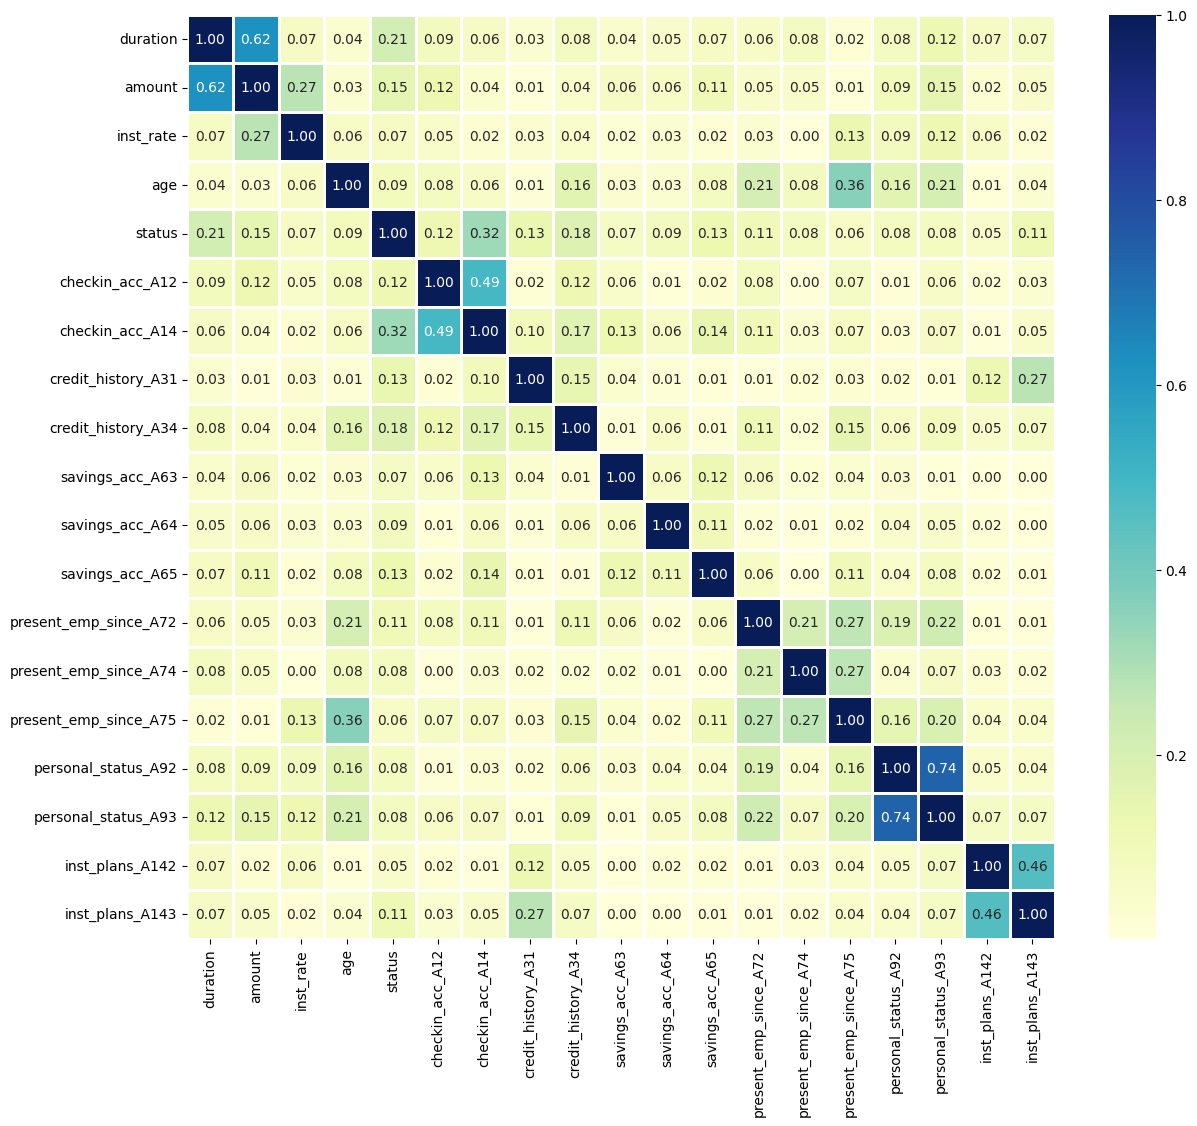

In [8]:
correlation_matrix=german_credit_rating.corr().abs()
significant_correlation=correlation_matrix["status"][correlation_matrix['status']>0.05]
plt.figure(figsize=(14,12))
sns.heatmap(correlation_matrix.loc[significant_correlation.index,significant_correlation.index]
            ,cmap='YlGnBu',annot=True,linewidths=.9,fmt=".2f")

In [9]:
X=german_credit_rating.drop("status",axis=1)
y=german_credit_rating.status

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42)

In [10]:
logistic_model=LogisticRegression(max_iter=5000)
logistic_model.fit(X_train,y_train)
y_pred= logistic_model.predict(X_test)
accuracy=accuracy_score(y_pred,y_test)
print(f'Accuracy: {accuracy*100:.2f}%')

Accuracy: 77.50%


Baseline accuracy is 77.5%. Now, we’ll introduce several changes, but we’ll only adopt those that enhance accuracy. Any modifications that result in a decrease in the current accuracy value will be disregarded.

<h2>2nd Change:-</h2> Implement Standard Scaler

In [11]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,train_size=0.8,random_state=42)

In [13]:
logistic_model.fit(X_train,y_train)
y_pred= logistic_model.predict(X_test)
accuracy=accuracy_score(y_pred,y_test)
print(f'Accuracy: {accuracy*100:.2f}%')

Accuracy: 78.00%


We will keep it this change

From now on instead of X we wil use X_scaled for model training

<h2>3rd Change:-</h2> SMOTE

Unfortunate SMOTE did not work in our favor (Accuracy: 73.57%) so we will discard this change and comment out the above code

<h2>4th Change:-</h2> PCA to reduce feature

Unfortunately PCA did not work in our favor(Accuracy: 75.50%) so we will discard this change and comment out the above code

Here we are working on 26 most important features out of 36 features. Which is reducing the accuracy little but. As 36 feature is not a huge number now I will discard this change as well and comment out the above code

<h2> 5th Change:- </h2> Feature reduction using RFE and feature importance

As we can see the the performance did not improve (accuracy=73.5%). We will skip this change as well.

<h2>6th Change:-</h2> Label Encoding

In our case we can either do Label Encoding using mapping or String to Numeric conversion using existing value. We choose the later option

We can convert all categorical data either by one hot encoding of label encoding, we have already tried one hot encoding and it did not help much. so we will try a kind of kind of label enocoding by using existing values in those columns. We can see all the categorical columns have one letter and then few integers to create categories. we will remve the first character to convert those columns to numeric without changing much of its content. lets see how it works.

Label Encoding did not help (Accuracy=76.5%). Turned out one hot encoing using get dummies performed better than this.

<h2>6th Change:-</h2> One Hot Encoding using OneHotEncoder

Accuracy is only 75%.We can see result can be different for same process (here one hot encoding) when we use different libraries

<h3><span style="color:red;">Conclusion:</span></h3> We observed that among all the preprocessing steps we applied, only one-hot encoding using get_dummies and scaling using standard scaling proved effective for our case.

# Feature Engineering

Now we will try feature engineering based on the information available in <b>"german_credit_column_description.txt" </b>file. For example:- we can see credit history= "A30" means "no credits taken/ all credits paid back duly" but still in amount section value is present we will modify that value.

In [14]:
german_credit_rating=pd.read_csv("../data/German Credit Data.csv")

In [15]:
german_credit_rating.loc[german_credit_rating.credit_history=='A30',"amount"]=0

In [16]:
german_credit_rating.loc[german_credit_rating.job=='A171',"residing_since"]=0

In [17]:
german_credit_rating.head(5)

,checkin_acc,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,A11,6,A34,1169,A65,A75,4,A93,4,67,A143,2,A173,0
1,A12,48,A32,5951,A61,A73,2,A92,2,22,A143,1,A173,1
2,A14,12,A34,2096,A61,A74,2,A93,3,49,A143,1,A172,0
3,A11,42,A32,7882,A61,A74,2,A93,4,45,A143,1,A173,0
4,A11,24,A33,4870,A61,A73,3,A93,4,53,A143,2,A173,1


In [18]:
german_credit_rating=pd.get_dummies(german_credit_rating,drop_first=True)

In [19]:
X=german_credit_rating.drop("status",axis=1)
y=german_credit_rating.status

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42)

In [20]:
logistic_model=LogisticRegression(max_iter=5000)
logistic_model.fit(X_train,y_train)
y_pred= logistic_model.predict(X_test)
accuracy=accuracy_score(y_pred,y_test)
print(f'Accuracy: {accuracy*100:.2f}%')

Accuracy: 78.50%


# Select Correct Model using K Fold Cross Validation

Now we will try other models. But we will choose next model(s) using K Fold Cross Validation

In [21]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=5000),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Classifier': SVC(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

In [22]:
num_folds = 5
cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Evaluate each model using k-fold cross-validation
for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    print(f'{model_name}: Mean Accuracy = {scores.mean():.4f}, Std Dev = {scores.std():.4f}')

Logistic Regression: Mean Accuracy = 0.7390, Std Dev = 0.0159
Random Forest: Mean Accuracy = 0.7610, Std Dev = 0.0097
Support Vector Classifier: Mean Accuracy = 0.6960, Std Dev = 0.0037
Naive Bayes: Mean Accuracy = 0.7010, Std Dev = 0.0506
Decision Tree: Mean Accuracy = 0.6610, Std Dev = 0.0193
K-Nearest Neighbors: Mean Accuracy = 0.6520, Std Dev = 0.0299


We can see Random Forest is performing best so we will choose it

Hyperparameter tuning

In [23]:
parameters={
    "n_estimators":[50,100,200],
    "max_depth":[10,20,30],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4]
}
rf_model=RandomForestClassifier(random_state=42)

grid_search=GridSearchCV(estimator=rf_model,param_grid=parameters,cv=5,scoring="accuracy", error_score="raise")
grid_search.fit(X_train,y_train)

best_params=grid_search.best_params_
print(f"best Hyperparamerter= {best_params}")

best_rf_model= grid_search.best_estimator_
y_pred=best_rf_model.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)
print(f"final acuracy= {accuracy}")

best Hyperparamerter= {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
final acuracy= 0.75


In [24]:
random_forest_model=RandomForestClassifier(**best_params,random_state=42)
random_forest_model.fit(X_train,y_train)
y_pred=random_forest_model.predict(X_test)
accuracy=accuracy_score(y_pred, y_test)
print(f'Accuracy: {accuracy*100:.2f}%')

Accuracy: 75.00%


<h3><span style="color:red;">Final Verdict:- </span></h3>We can see with feature engineering and Logistic regression we are getting best result. We will go ahead with that